In [1]:
%matplotlib inline


In [2]:
# Import dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [3]:
# Files to load.

city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"


## CHALLENGE - PART 1: Create a Pyber Summary DataFrame.

In [4]:

city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df = pd.read_csv(ride_data_to_load, parse_dates=['date'])

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# MERGE both DFs into a single dataset using the "city" column they both have in common. 

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
# Checking data types for each column.

pyber_data_df.dtypes


city                    object
date            datetime64[ns]
fare                   float64
ride_id                  int64
driver_count             int64
type                    object
dtype: object

In [8]:
# 1.- Get the total number of rides for each city type.

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_rides


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [9]:
# 1.- Get the total number of drivers for each city type.

total_drivers = city_data_df.groupby(['type'])['driver_count'].sum()

total_drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [10]:
# 1.- Get the total fares for each city type.

total_fares = pyber_data_df.groupby(["type"])["fare"].sum()

total_fares


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [11]:
# 2.- Calculate the average fare per ride for each city type.

avg_fare_per_ride = pyber_data_df.groupby(["type"]).mean()["fare"]

avg_fare_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [12]:
# 2.- Calculate the average fare per driver for each city type.

avg_fare_per_driver = total_fares / total_drivers

avg_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [13]:
# Create a summary DataFrame with these columns: Total Rides, Total Drivers, Total Fares, Average Fare per Ride,
# and Average Fare per Driver.

summary_df = pd.DataFrame({"Total Rides": total_rides, "Total Drivers": total_drivers, "Total Fares": total_fares,
                          "Average Fare per Ride": avg_fare_per_ride, "Average Fare per Driver": avg_fare_per_driver})

In [14]:
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [15]:
# 3.- Remove the index name ("type" column title).

summary_df.index.name = None

summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [16]:
# 4.- Format dataframe values.

summary_df.style.format({'Total Rides': "{:,}", 'Total Drivers': "{:,}", 'Total Fares': "${:,.2f}", 
                         'Average Fare per Ride': "${:,.2f}", 'Average Fare per Driver': "${:,.2f}"})


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## CHALLENGE - PART 2: Create a Multiple-Line Plot for the Sum of Fares for Each City Type.

In [17]:
# Display the pyber_data_df data.

pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# 1.- Rename columns of the pyber_data_df.

pyber_data_df.rename(columns={'city': 'City', 'date': 'Date', 'fare': 'Fare', 'ride_id': 'Ride Id',
                             'driver_count': 'No. Drivers', 'type': 'City Type'}, inplace=True)


In [19]:
pyber_data_df.head()


,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# 2.- Set the index to the Date column (inplace=True modifies the DF in place; doesn't create a new object).

pyber_data_df.set_index('Date', inplace=True)

In [21]:
pyber_data_df.head()


,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [22]:
# 3.- Create a new DataFrame for fares using copy(). Include only Date, City Type, and Fare columns.

date_df = pyber_data_df.copy()

date_df.drop(columns=['City', 'Ride Id', 'No. Drivers'])


,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [23]:
# 4.- There is no extra "Date" column to drop.
# 5.- New DataFrame is already indexed by the "Date" column.


In [24]:
# 6.- Check new date_df using info() to ensure index is a datetime data type.

date_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 5 columns):
City           2375 non-null object
Fare           2375 non-null float64
Ride Id        2375 non-null int64
No. Drivers    2375 non-null int64
City Type      2375 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 111.3+ KB


In [25]:
# 7.- Calculate the sum of fares by city type using sum() and groupby() to create a new DataFrame.

fares_by_type_df = date_df.groupby(["City Type"]).sum()["Fare"]

fares_by_type_df


City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [26]:
# 8.- Reset the index (needed for step 10).

fares_by_type_df = fares_by_type_df.reset_index()

fares_by_type_df

,City Type,Fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [27]:
# 9.- Create PIVOT table DataFrame with "Date" as index & columns='City Type' with "Fare"for each Date in each row.
# NOTE: There will be NaNs which will be taken care of when sum() based on date.

pivot_df = pd.pivot_table(date_df, values='Fare', index='Date', columns='City Type')

pivot_df


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [28]:
# 10.- Create a new DataFrame from the PIVOT table on the given dates '2019-01-01':'2019-04-28' using loc.

date_range_df = pivot_df.loc['2019-01-01':'2019-04-28']

date_range_df


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [29]:
# 11.- Create a new DataFrame in weekly bins , and calculate sum of fares for each week using resample().

weekly_df = date_range_df.resample('W').sum()

weekly_df


City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


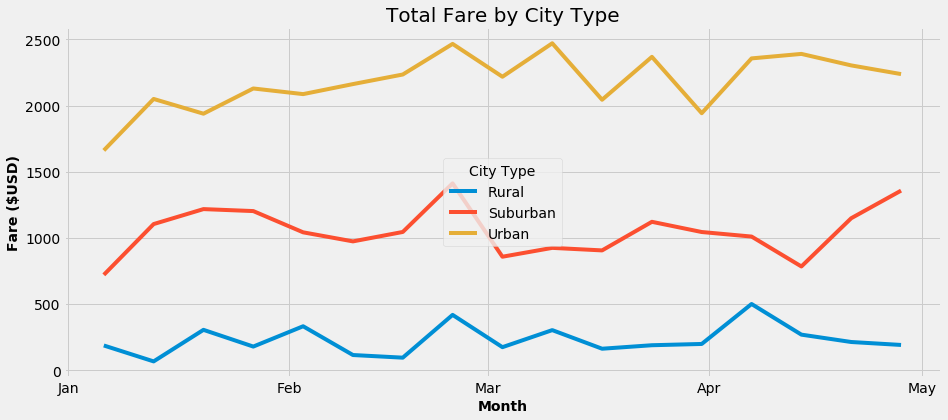

In [30]:
# 12.- Using the Object-Oriented method, plot the DataFrame using df.plot() and the 'fivethirtyeight' graph style.
# Import matplotlib.style as style to use 'fivethirtyeight' (x, y, figsize). Save the chart.

import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

years = mdates.YearLocator()   # Every Year
months = mdates.MonthLocator()  # Every Month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%b')

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(14, 6))

ax.set_title("Total Fare by City Type", fontsize=20)
ax.set_xlabel("Month", fontsize=14, fontweight='bold')
ax.set_ylabel("Fare ($USD)", fontsize=14, fontweight='bold')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_minor_formatter(years_fmt)

ax.xaxis.set_tick_params(which='minor', pad=20)

ax.plot(weekly_df.index, weekly_df["Rural"], label="Rural")
ax.plot(weekly_df.index, weekly_df["Suburban"], label="Suburban")
ax.plot(weekly_df.index, weekly_df["Urban"], label="Urban")

ax.legend(title='City Type', loc='center')


plt.savefig("Analysis/Fig1_Challenge.png")
